# Анализ рынка компьютерных игр 

## Описание данных и цель исследования

1. Собраны данные до 2016 года.Данные за 2016 год могут быть неполными.
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board)

2. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы

3. Цель исследования - выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.



In [1]:
import pandas as pd
import math
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Обзор данных

In [3]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [5]:
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
Other_sales        float64
Critic_Score       float64
User_Score          object
Rating              object
dtype: object

In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

<b>Вывод:</b> На этапе ознакомления с данными были выявлены следующие недостатки:
<p> 1. Некорректные названия столбцов
<p> 2.  Пропуски в данных
<p> 3.  Неподходящие типы данных
  
    

## 2. Подготовка данных

1.Замена названий столбцов(приведение к нижнему регистру)

In [9]:
df.columns = df.columns.str.lower()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

2.Исправление пропусков

In [11]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [12]:
df[df['critic_score'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [14]:
df['critic_score'] = df['critic_score'].fillna(-1) #Заглушка для пропущенных значений
df['user_score'] = df['user_score'].replace({'tbd':None}) # Замена tbd на None
df['user_score'] = df['user_score'].fillna(-1)

In [15]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6766
dtype: int64

In [16]:
df['rating'] = df['rating'].fillna('No_data')

In [17]:
df.isna().sum()

name                 2
platform             0
year_of_release    269
genre                2
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score         0
user_score           0
rating               0
dtype: int64

Теперь оставшиеся пропуски можно сбросить так как их не так много

In [19]:
df.dropna(inplace=True)
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Добавим стобец с общим количеством продаж

In [20]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

3.Приведение к подходящему типу данных

In [22]:
df['year_of_release'] = df['year_of_release'].astype(int)
df['user_score'] = df['user_score'].astype(float)

In [23]:
df.dtypes

name                object
platform            object
year_of_release      int32
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
total_sales        float64
dtype: object

## 3. EDA

Оценим сколько игр выпускалось в разные годы

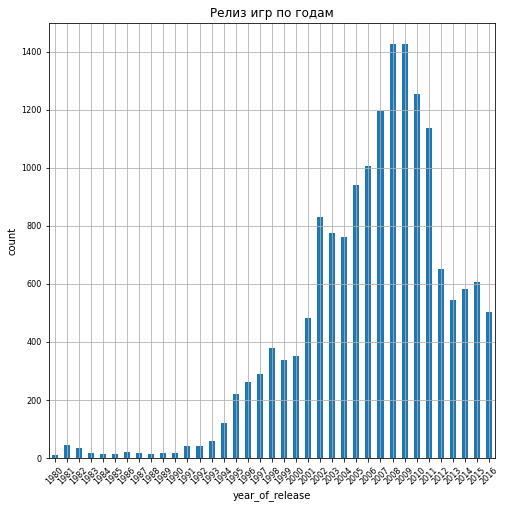

In [24]:
df.groupby(['year_of_release'])['name'].count().plot(kind='bar', rot=45, figsize=(8,8), fontsize=(8), ylabel ='count', title ='Релиз игр по годам', grid=True)
print()

Пик выпуска игр приходится на середину, конец двухтысячных годов

Посмотрим, как менялись продажи по платформам. Затем выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

In [26]:
platform_total_sales_all_years = df.groupby(['platform'])['total_sales'].sum().reset_index().sort_values('total_sales', ascending=False)
platform_total_sales_all_years = platform_total_sales_all_years.head(15) # Наш топ-15 платформ по продажам
platform_total_sales_all_years

,platform,total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


In [27]:
platform_total_sales_all_years['platform'].values

array(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP',
       '3DS', 'PC', 'GB', 'XB', 'NES', 'N64'], dtype=object)

In [28]:
df.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()

,platform,year_of_release,total_sales
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
4,2600,1984,0.27
...,...,...,...
233,XB,2008,0.18
234,XOne,2013,18.96
235,XOne,2014,54.07
236,XOne,2015,60.14


In [29]:
total_sales_top_15 = df.query('platform == ["PS2","X360", "PS3", "Wii", "DS", "PS","PS4", "GBA", "PSP", "3DS", "PC", "GB", "XB", "NES", "N64"]')
total_sales_top_15.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()
total_sales_top_15 = total_sales_top_15.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()

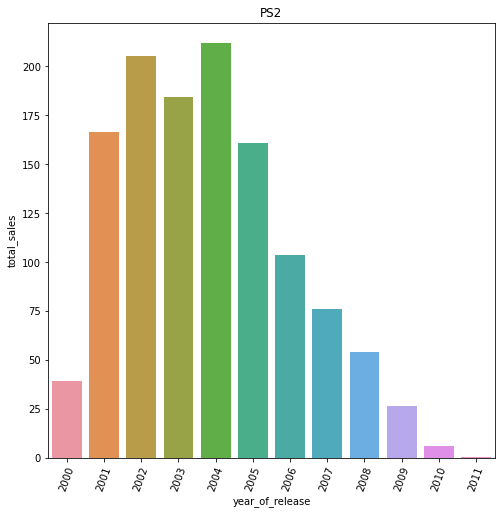

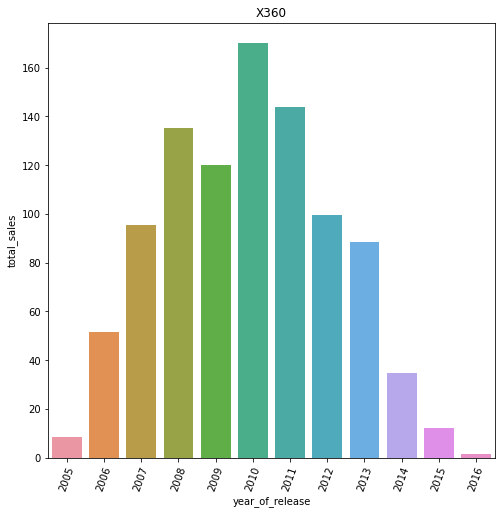

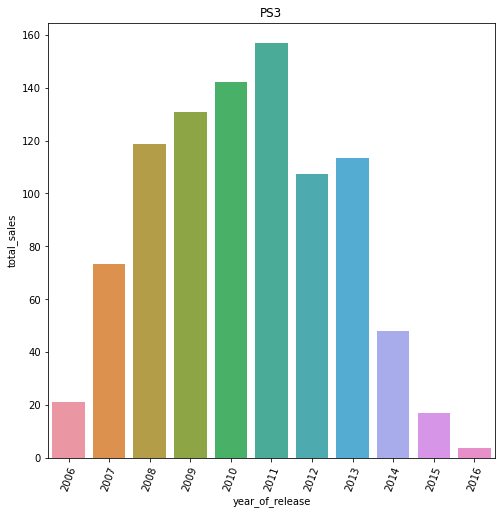

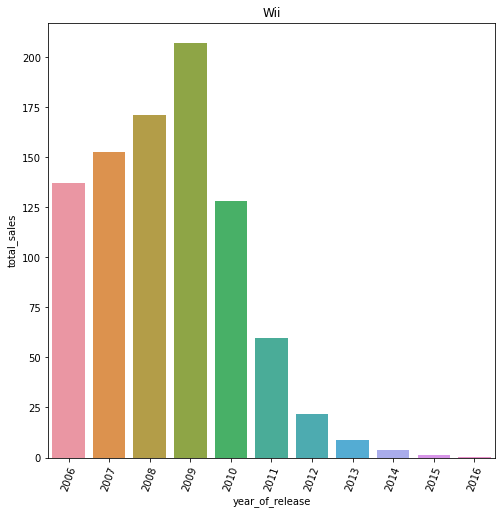

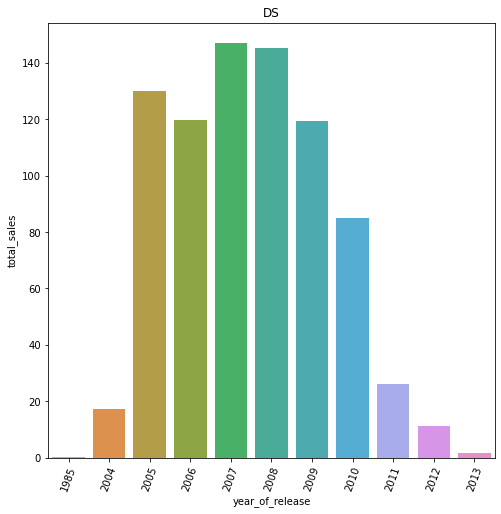

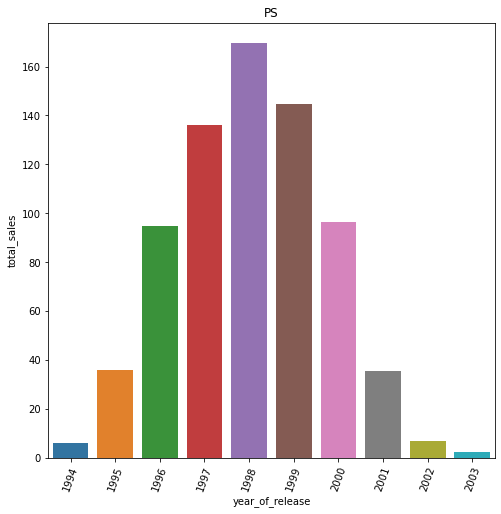

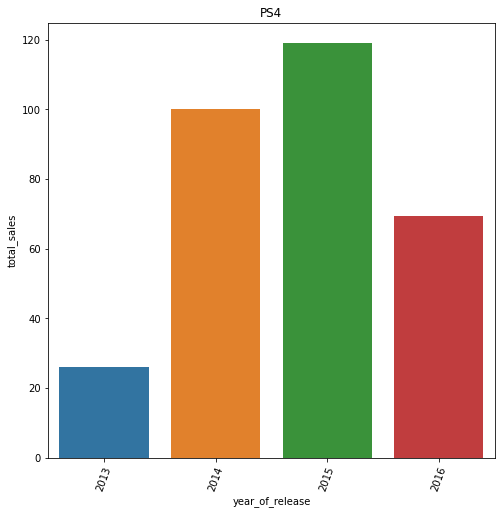

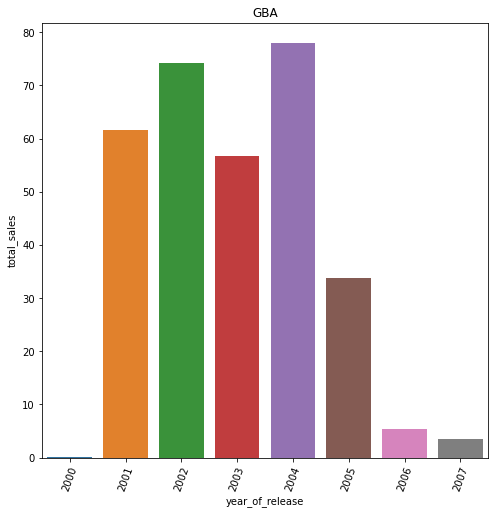

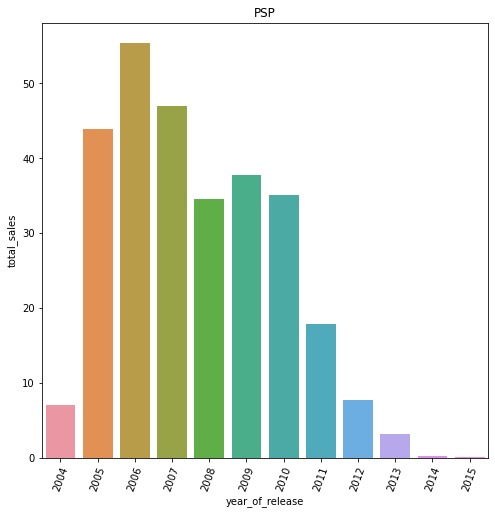

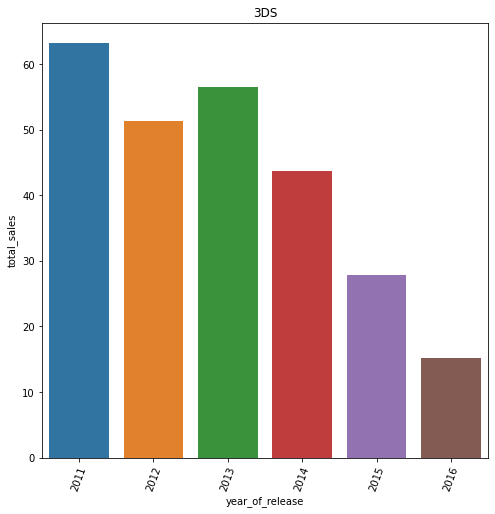

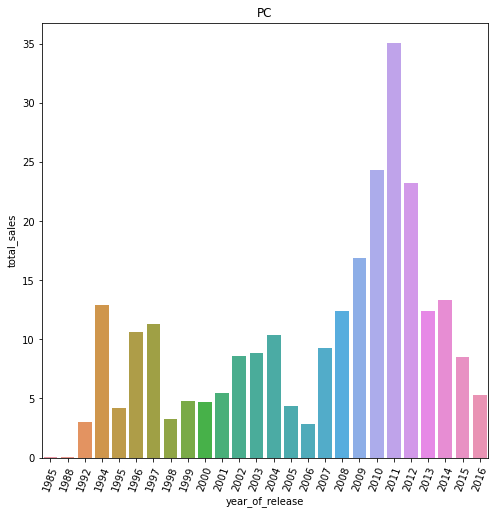

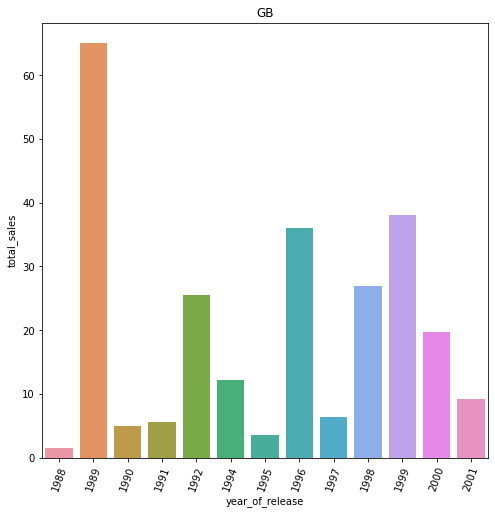

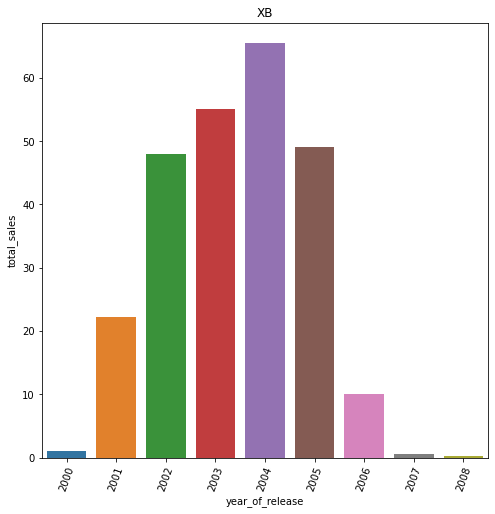

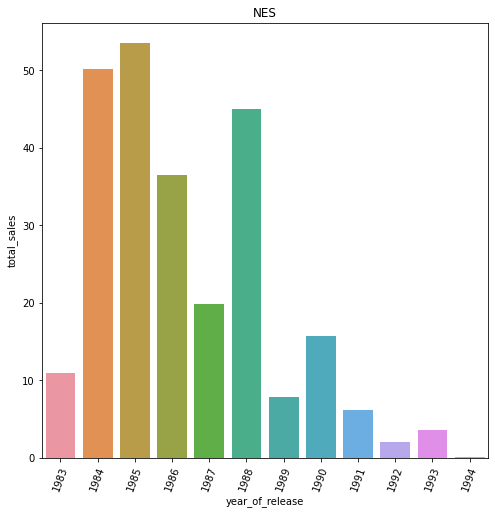

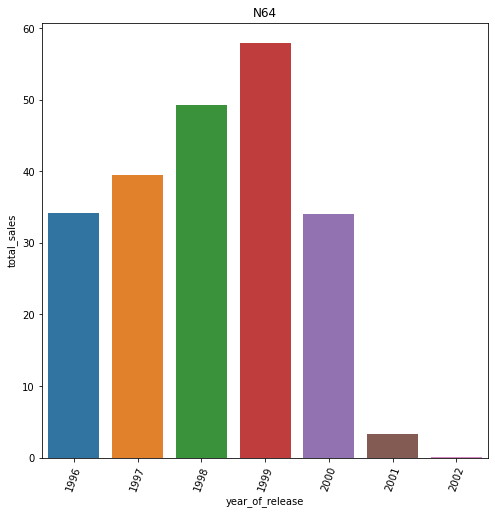

In [30]:
for platform in ["PS2","X360", "PS3", "Wii", "DS", "PS","PS4", "GBA", "PSP", "3DS", "PC", "GB", "XB", "NES", "N64"]:
    plt.figure(figsize=(8,8))
    plt.xticks(rotation=70)
    sns.barplot(x="year_of_release", y="total_sales", data=total_sales_top_15[total_sales_top_15['platform']==platform], ci=None).set_title(platform)
    plt.show()

In [31]:
total_sales_top_15

,platform,year_of_release,total_sales
0,3DS,2011,63.20
1,3DS,2012,51.36
2,3DS,2013,56.57
3,3DS,2014,43.76
4,3DS,2015,27.78
...,...,...,...
159,XB,2004,65.42
160,XB,2005,49.08
161,XB,2006,10.04
162,XB,2007,0.55


In [34]:
df_last_5_years = df.query('year_of_release >= 2012') # Проанализируем игры за актуальный период
df_last_5_years['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC',
       'PSV', 'PSP'], dtype=object)

Посмотрим какие платформы лидируют по продажам, растут или падают. Затем выберем несколько потенциально прибыльных платформ.

In [36]:
df_last_5_years_group = df_last_5_years.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()

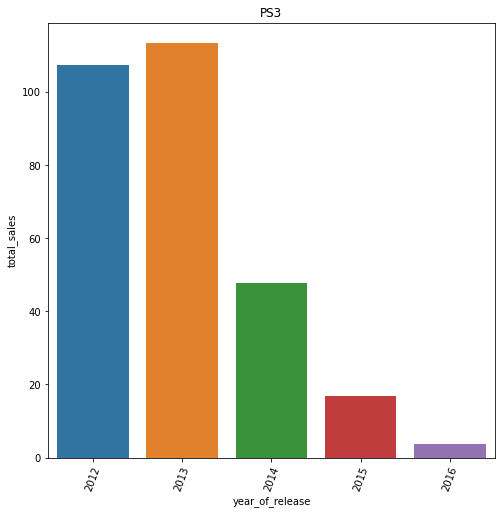

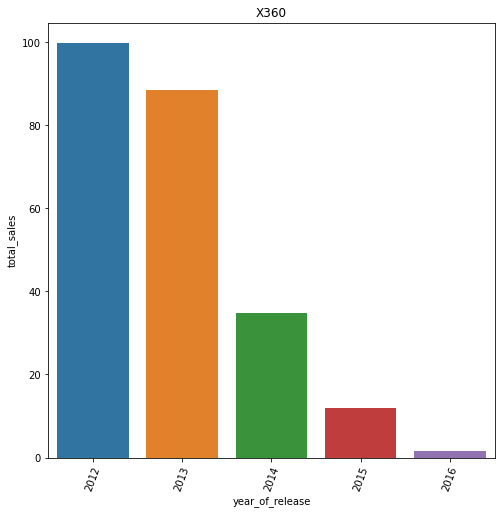

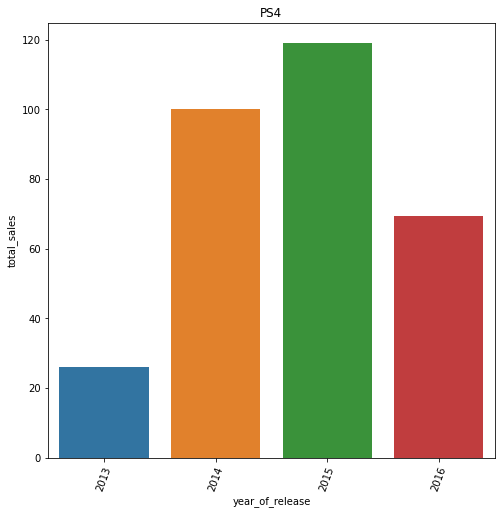

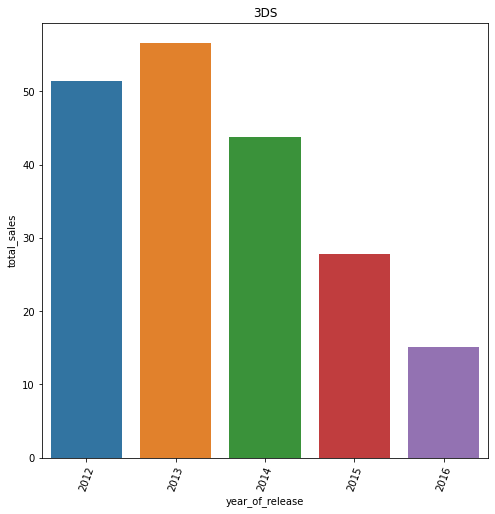

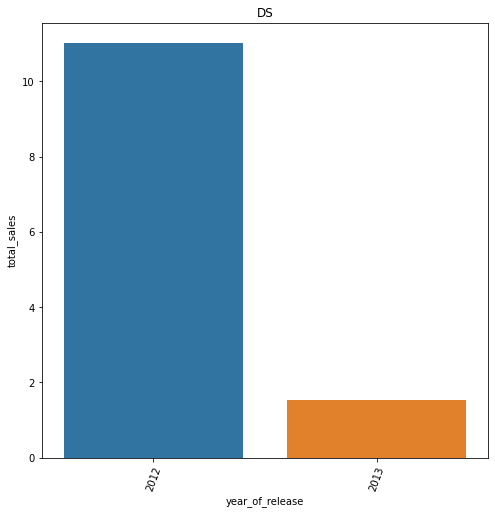

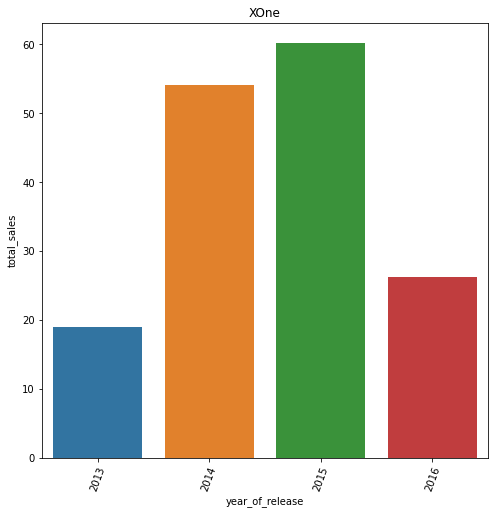

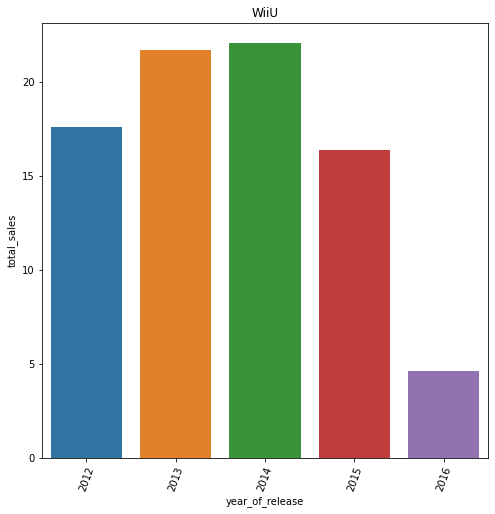

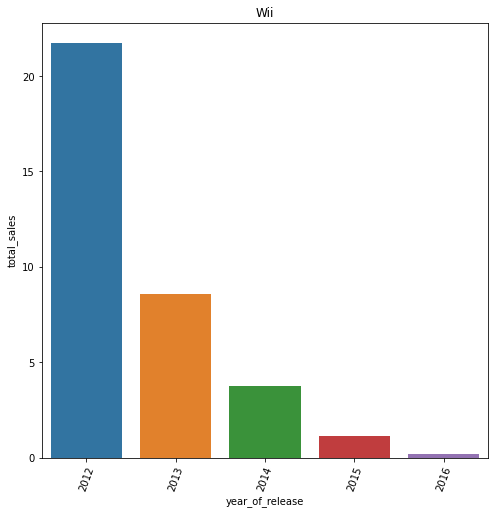

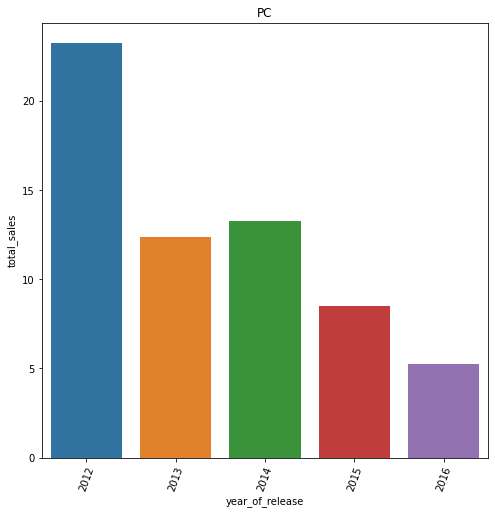

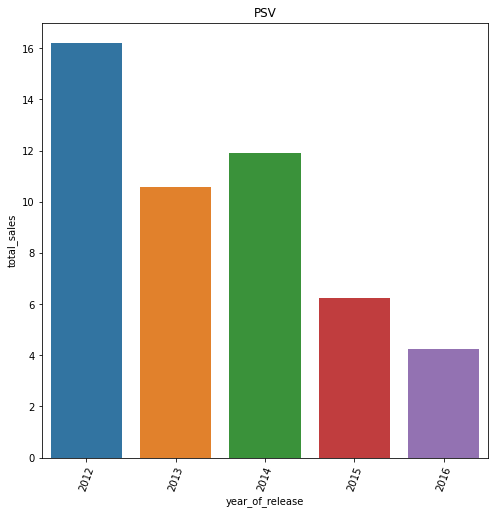

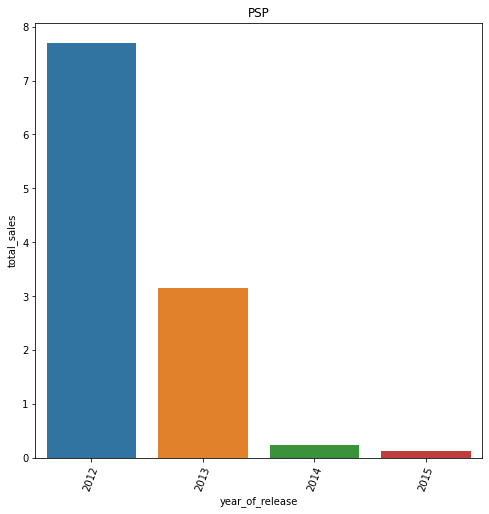

In [37]:
for platform in ['PS3', 'X360', 'PS4', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV', 'PSP']:
    plt.figure(figsize=(8,8))
    plt.xticks(rotation=70)
    sns.barplot(x="year_of_release", y="total_sales", data=df_last_5_years_group[df_last_5_years_group['platform']==platform], ci=None).set_title(platform)
    plt.show()

Лучше будет убрать из анализа платформы, которые к 2016 году уже "умерли" и закончили свой жизненный цикл.Это можно увидеть на графиках 

In [38]:
df_last_5_years_top = df_last_5_years.query( 'platform == ["PS4","3DS", "PC", "XOne", "WiiU","PSV"]')
df_last_5_years_top
df_last_5_years_top.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()

,platform,total_sales
0,PS4,314.14
1,3DS,194.61
2,XOne,159.32
3,WiiU,82.19
4,PC,62.65
5,PSV,49.18


Таким образом мы получили перечень потенциальных платформ 

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

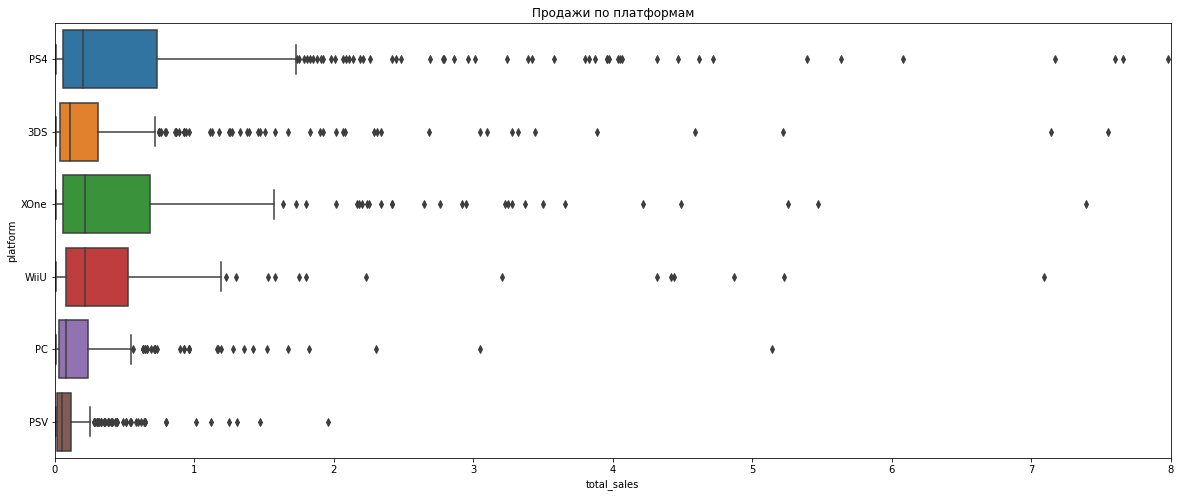

In [40]:
plt.figure(figsize=(20,8))
plt.xlim(0,8)
plt.title('Продажи по платформам')
sns.boxplot(x='total_sales',y='platform', data=df_last_5_years_top)
print()


<b>Вывод по графикам:</b> Можно увидеть, что средние значения продаж в разбивке по платформам отличаются как и объемы продаж. Также заметны выбросы. Однако, в данном случае выбросы могут интерпретирваться как очень удачные продажи, поэтому удалять их не стоит.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [43]:
df_last_5_years_top_filtred_user = df_last_5_years_top.query('user_score != -1')

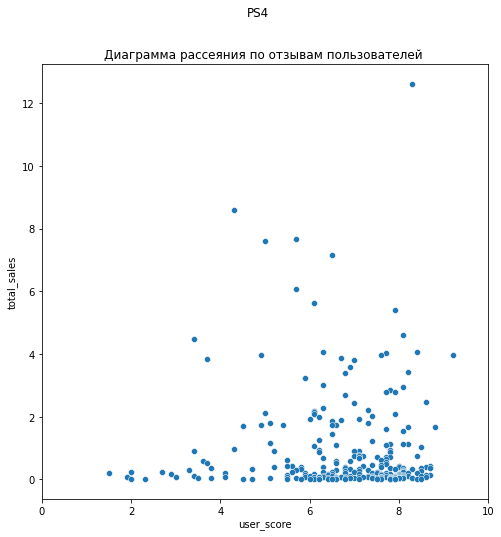

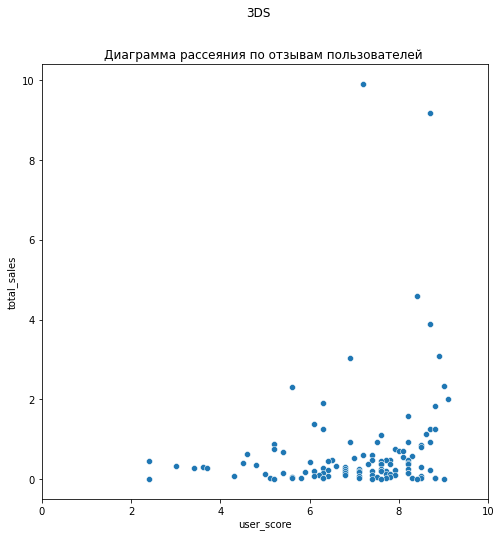

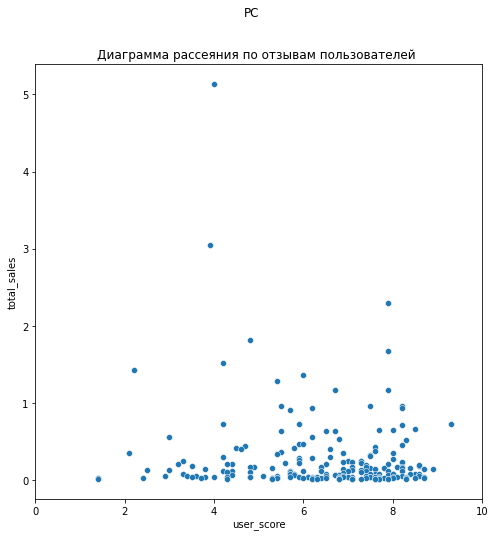

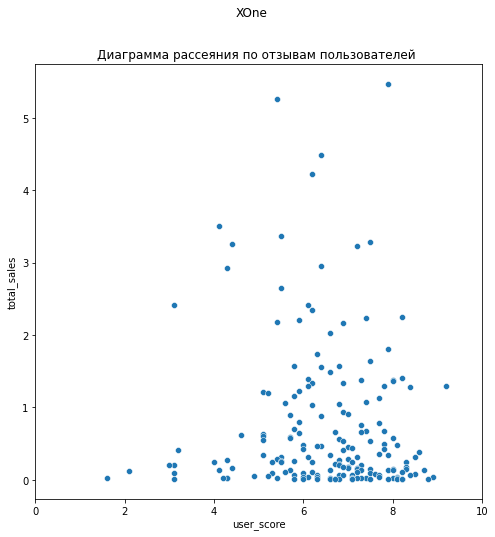

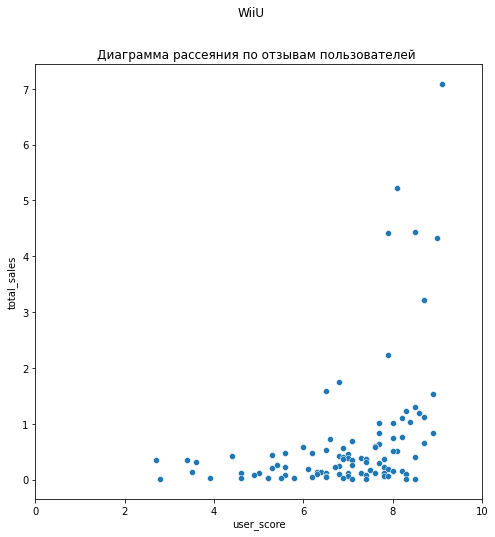

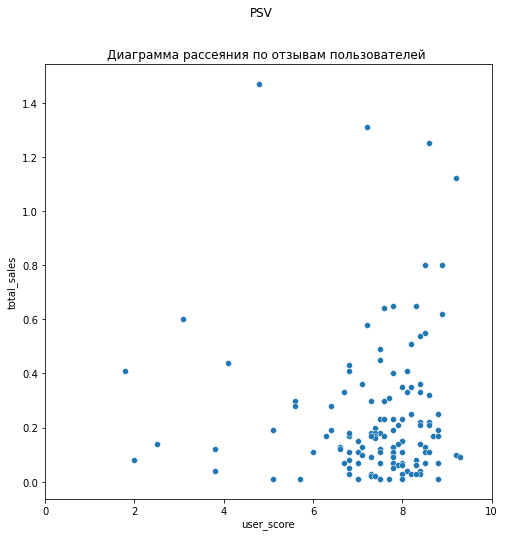

In [44]:
for pltf in ["PS4","3DS", "PC", "XOne", "WiiU","PSV"]:
    plt.figure(figsize=(8,8))
    plt.xlim(0,10)
    plt.title('Диаграмма рассеяния по отзывам пользователей ')
    plt.suptitle(pltf)
    sns.scatterplot(data=df_last_5_years_top_filtred_user[df_last_5_years_top_filtred_user['platform'] == pltf], y='total_sales', x='user_score')
    plt.show()

Теперь предварительно отфильтруем по значениям в critic_score

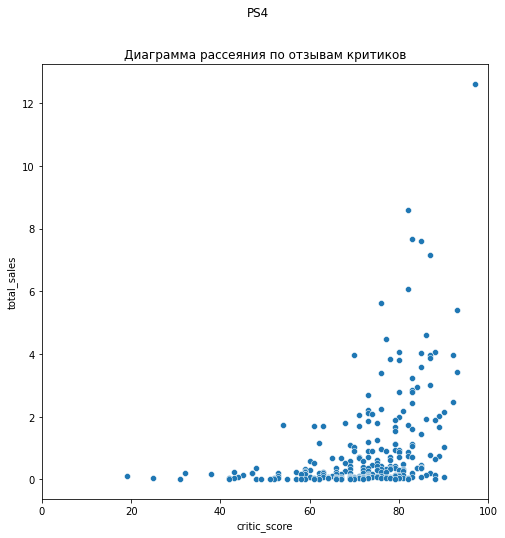

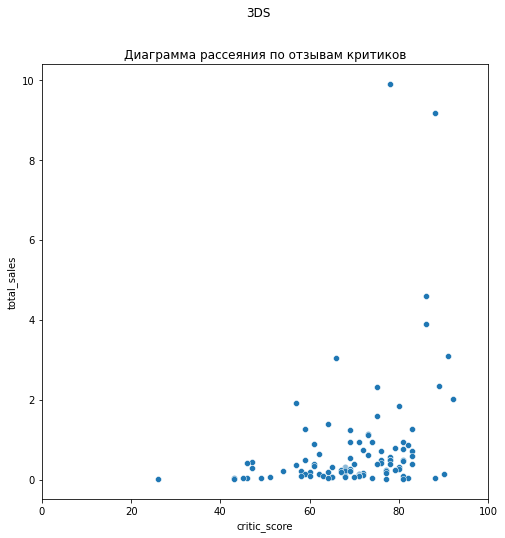

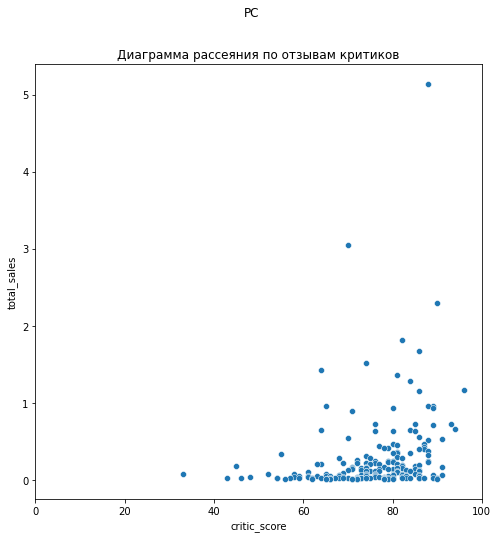

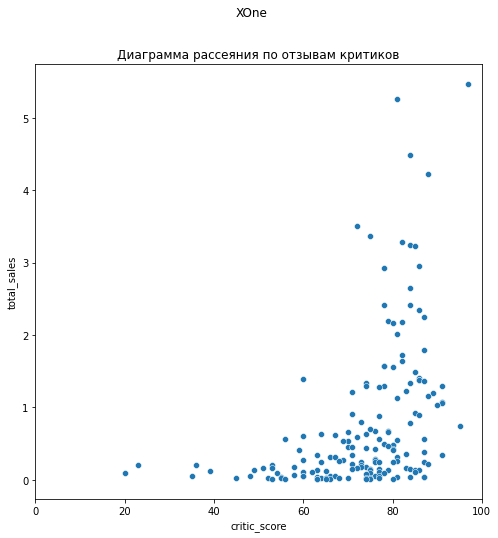

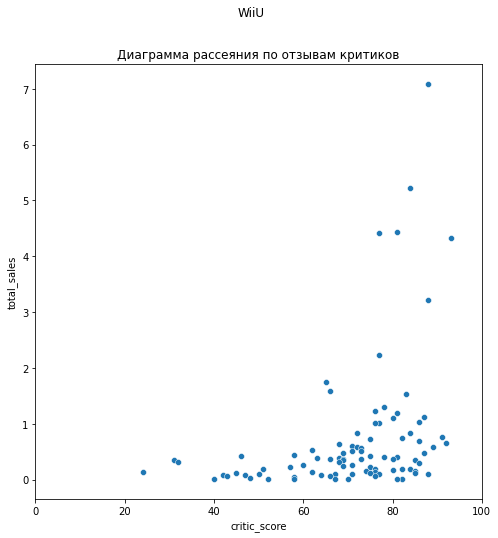

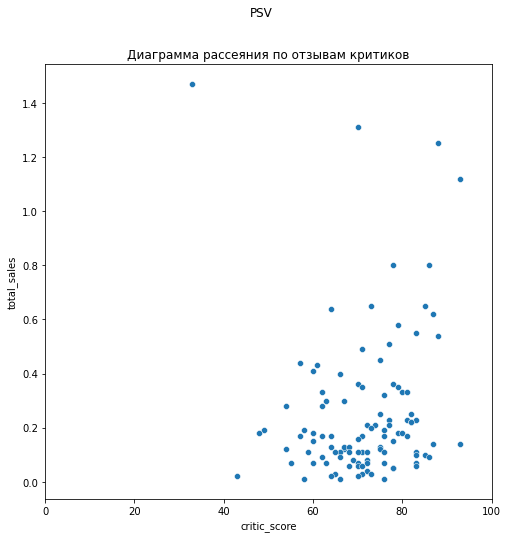

In [46]:
df_last_5_years_top_filtred_critic = df_last_5_years_top.query('critic_score != -1')
for pltf in ["PS4","3DS", "PC", "XOne", "WiiU","PSV"]:
    plt.figure(figsize=(8,8))
    plt.xlim(0,100)
    plt.title('Диаграмма рассеяния по отзывам критиков')
    plt.suptitle(pltf)
    sns.scatterplot(data=df_last_5_years_top_filtred_critic[df_last_5_years_top_filtred_critic['platform'] == pltf], y='total_sales', x='critic_score')
    plt.show()

Для корреляции по каждой платформе отдельно, можно отфильтровать данные по двум полям

In [49]:
df_last_5_years_top_filtred = df_last_5_years_top.query('critic_score != -1 and user_score != -1')
for i in ["PS4","3DS", "PC", "XOne", "WiiU","PSV"]:
    print(i)
    x = df_last_5_years_top_filtred[df_last_5_years_top_filtred['platform'] == i][['critic_score','user_score','total_sales']].corr().drop(['critic_score','user_score'], axis=0)
    display(x)

PS4


,critic_score,user_score,total_sales
total_sales,0.405895,-0.033625,1.0


3DS


,critic_score,user_score,total_sales
total_sales,0.310553,0.201813,1.0


PC


,critic_score,user_score,total_sales
total_sales,0.236008,-0.136934,1.0


XOne


,critic_score,user_score,total_sales
total_sales,0.410422,-0.094003,1.0


WiiU


,critic_score,user_score,total_sales
total_sales,0.350882,0.391848,1.0


PSV


,critic_score,user_score,total_sales
total_sales,0.093988,0.013902,1.0


<b>Разбивка по платформам показывает схожие результаты с корреляцией по общей базе,которую можно увидеть ниже в анализе. Выделяются платформы 3DS и WiiU. Там оценки критиков и пользователей имеют относительно в сравнимой степени небольшую положительную корреляцию с продажами. В отличии от других платформ, где оценки критиков заметно сильнее влияют на продажи чем оценки пользователей.

Ниже будет диаграмма рассеяния  где все платформы представлены на одном графике

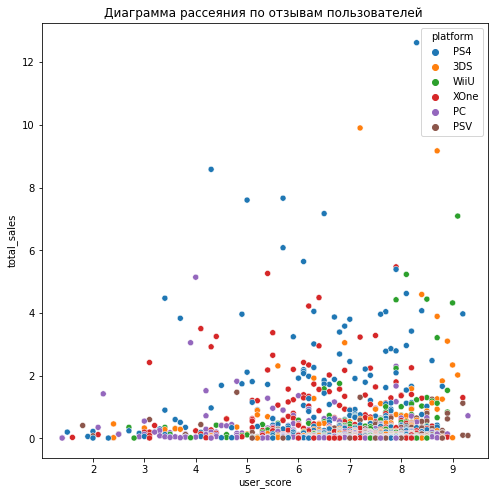

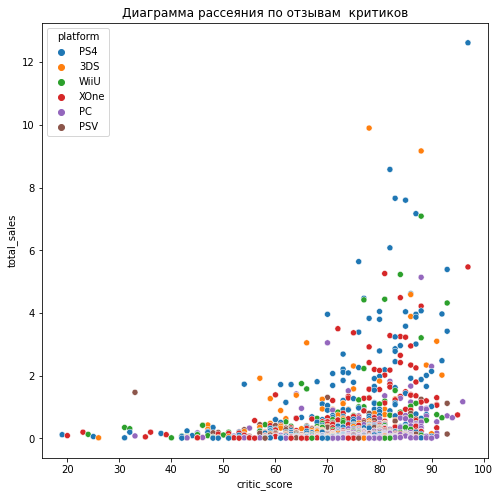

In [50]:
plt.figure(figsize=(8,8))
plt.title('Диаграмма рассеяния по отзывам пользователей ')
sns.scatterplot(data=df_last_5_years_top_filtred_user, y='total_sales', x='user_score', hue='platform')
plt.show()
plt.figure(figsize=(8,8))
plt.title('Диаграмма рассеяния по отзывам  критиков')
sns.scatterplot(data=df_last_5_years_top_filtred_critic, y='total_sales', x='critic_score', hue='platform')
plt.show()

<b>Можно увидеть, что рассеяние по отзывам пользователей менее плотное или менее концентрированное, чем рассеяние по отзывам критиков. Можно предположить, что оценки критиков значительнее влияют на продажи. Низкие оценки критиков чаще влияют на низкие продажи, чем низкие оценки пользователей.

In [51]:
df_last_5_years_top_filtred[['critic_score','user_score','total_sales']].corr().drop(['critic_score','user_score'], axis=0)

,critic_score,user_score,total_sales
total_sales,0.305575,0.012847,1.0


In [52]:
df_last_5_years_top_filtred[['critic_score','user_score','total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.500946,0.305575
user_score,0.500946,1.000000,0.012847
total_sales,0.305575,0.012847,1.000000


<b>Оценки критиков имеют небольшую положительную корреляцию с суммарными продажами. Чем выше оценка, тем выше продажи. Оценки пользователей практически не влияют на продажи.

Посмотрим на общее распределение игр по жанрам

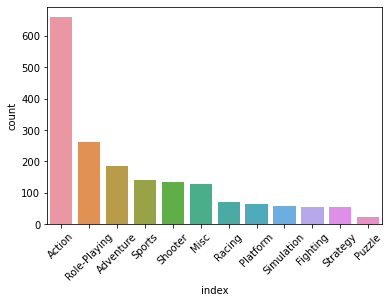

In [53]:
df_last_5_years_top['genre'].value_counts().reset_index().rename(columns={'genre':'count'})
plt.xticks(rotation=45)
sns.barplot(data=df_last_5_years_top['genre'].value_counts().reset_index().rename(columns={'genre':'count'}), x='index', y='count')
plt.show()

Чаще всего встречаются игры жанра Action

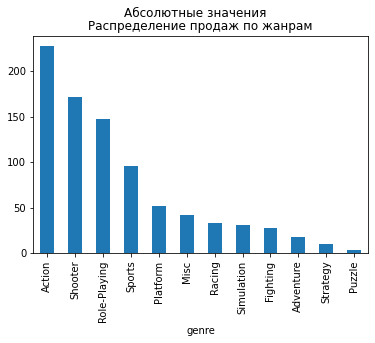

In [54]:
plt.title('Распределение продаж по жанрам')
plt.suptitle('Абсолютные значения')
df_last_5_years_top.groupby(['genre'])['total_sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.show()


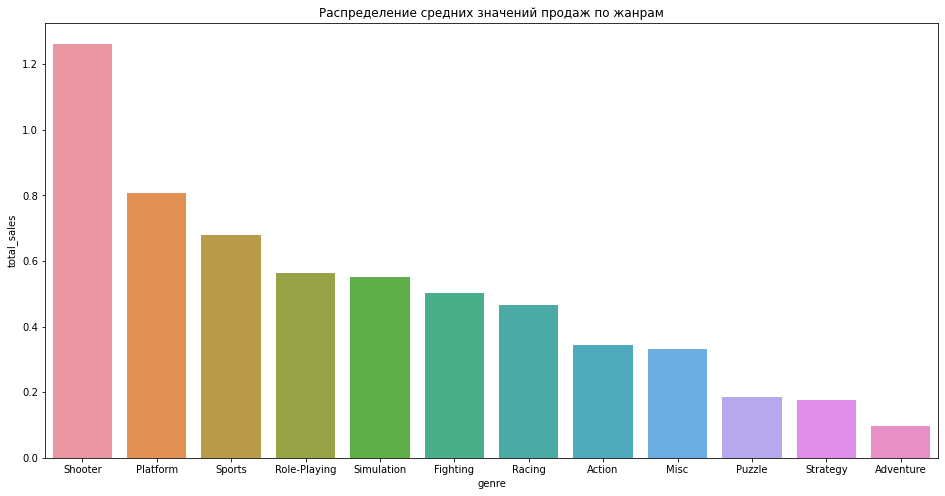

In [55]:
plt.figure(figsize=(16,8))
plt.title('Распределение средних значений продаж по жанрам')
sns.barplot(x='genre', y='total_sales', data=df_last_5_years_top, order=df_last_5_years_top.groupby(['genre'])['total_sales'].mean().reset_index().sort_values('total_sales',ascending=False)['genre'], ci=None)
plt.show()

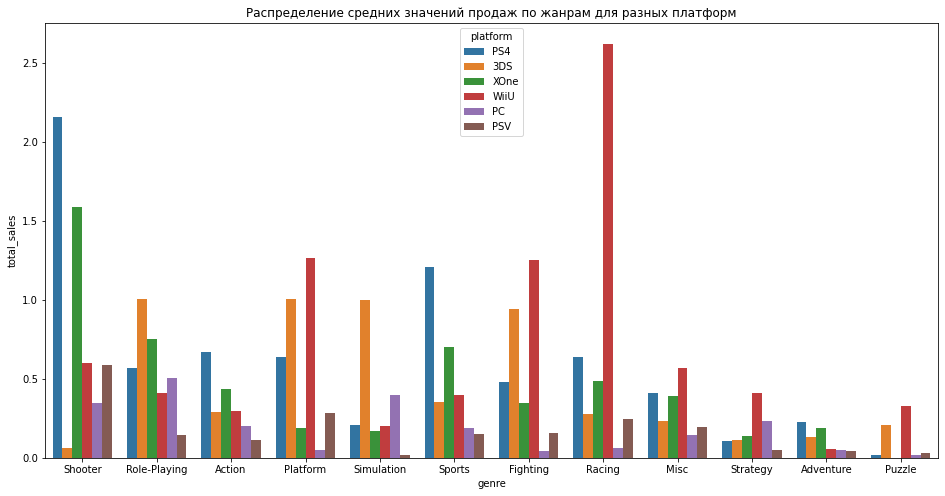

In [56]:
plt.figure(figsize=(16,8))
plt.title('Распределение средних значений продаж по жанрам для разных платформ')
sns.barplot(x='genre', y='total_sales', hue='platform', data=df_last_5_years_top, ci=None)
plt.show()

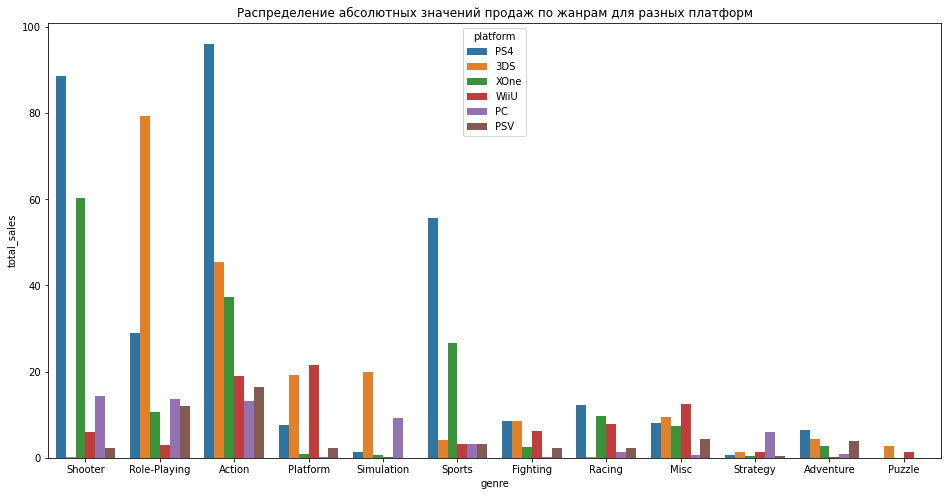

In [57]:
plt.figure(figsize=(16,8))
plt.title('Распределение абсолютных значений продаж по жанрам для разных платформ')
sns.barplot(x='genre', y='total_sales', hue='platform', data=df_last_5_years_top, estimator=sum, ci=None)
plt.show()

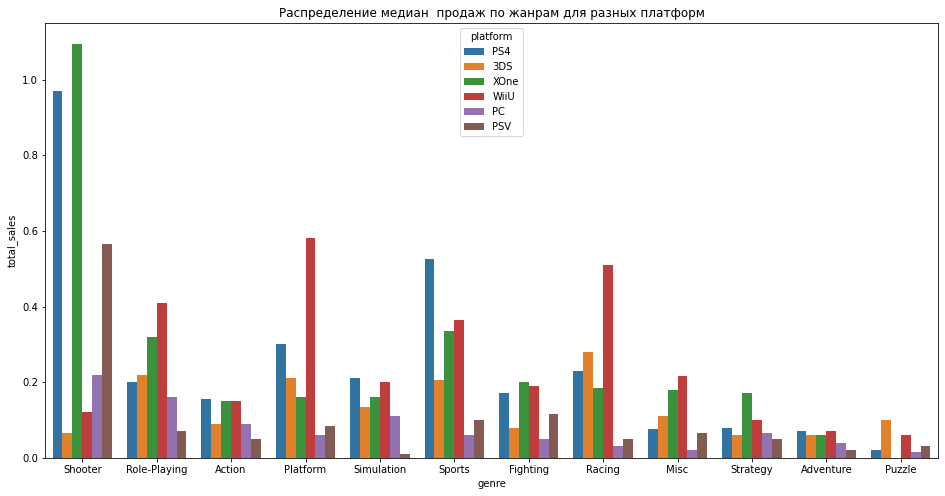

In [58]:
from numpy import median
plt.figure(figsize=(16,8))
plt.title('Распределение медиан  продаж по жанрам для разных платформ')
sns.barplot(x='genre', y='total_sales', hue='platform', estimator=median, data=df_last_5_years_top, ci=None)
plt.show()

In [59]:
order = df_last_5_years_top.groupby('genre')['total_sales'].median().reset_index().sort_values('total_sales', ascending=False)

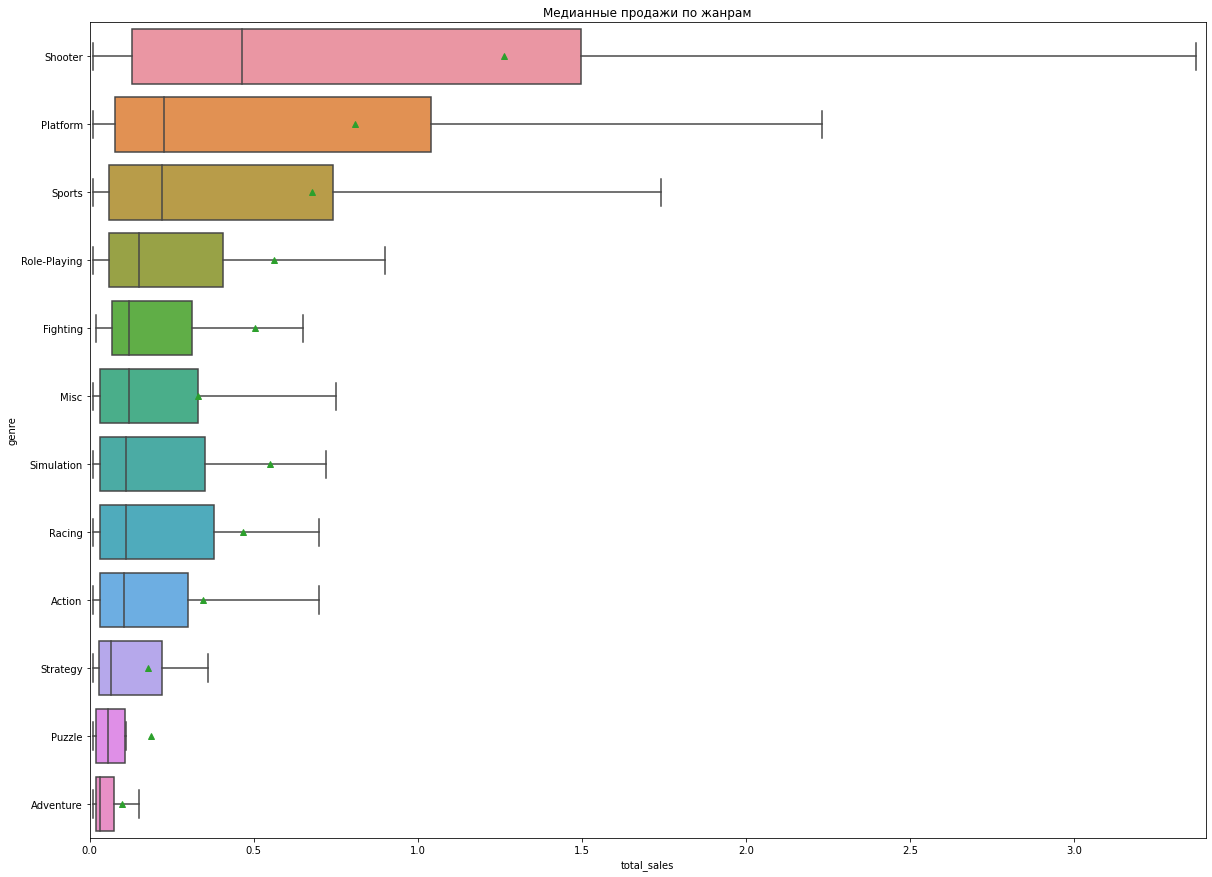

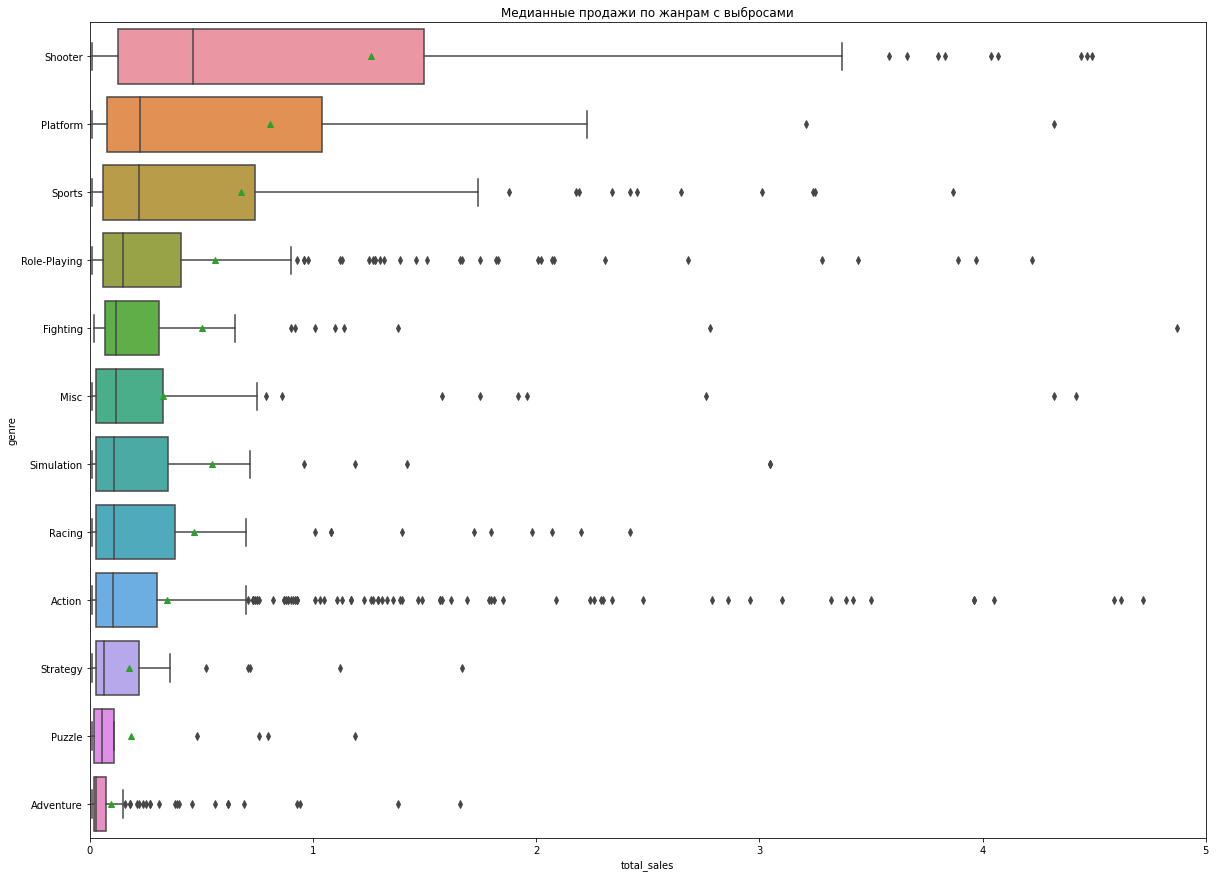

In [60]:
plt.figure(figsize=(20,15))
plt.xlim(0,3.4)
plt.title('Медианные продажи по жанрам')
sns.boxplot(x='total_sales',y='genre', data=df_last_5_years_top, order=order['genre'], showmeans=True, showfliers=False)
plt.show()
plt.figure(figsize=(20,15))
plt.xlim(0,5)
plt.title('Медианные продажи по жанрам с выбросами')
sns.boxplot(x='total_sales',y='genre', data=df_last_5_years_top, order=order['genre'], showmeans=True)
plt.show()

<b>Вывод по распределениям по жанру:
<p> Чаще всего в базе данных встречаются игры жанра Action, затем идут ролевые, приключенческие, шутеры и спортивные игры, платформеры. Это топ-5 по частоте. По абсолютным значениям продаж в первой пятерке экшн, шутеры, ролевые, спортивные, платформеры. По средним значениям продаж можно увидеть следующих лидеров:шутеры, платформеры,  спортивные, ролевые, файтинги.
<p> В разбивке по платформам мы можем увидеть абсолютные и средние значения продаж для каждой платформы. Так например для PS4 средние продажи самые высокие для игр жанра шутер, а продажи в абсолютных значениях самые высокие для игр жанра экшн. Для выстраивания стратегии продаж можно подобрать подходящий показатель. На средние значения влияет количество выпущенных игр той или иной категории.
<p><b> Из приведенных выше графиков можно увидеть какие жанры стабильно хорошо продаются. На них есть хороший спрос вне сильной зависимости от маркетинговых усилий
   
 

<b> Вывод:</b> На данном этапе была рассмотрена динамика выхода игр по годам. Исходя из этого был определен подходящий для анализа период, был определен жизненный цикл для разных платформ.Он составил 10 лет. На основе базы игр, входящих в определенный актуальный период были выбраны лидеры продаж, наиболее потенциальные платформы. Далее было рассмотрено распределение игр по жанрам. Затем была определена степень зависимости между величиной продаж и отзывами критиков и пользователей. На основе анализа был сделан вывод, что оценки критиков влияют значительнее на продажи. Выделяются платформы 3DS и WiiU. Там оценки критиков и пользователей имеют небольшую положительную корреляцию с продажами.

## 4. Портрет пользователя каждого региона

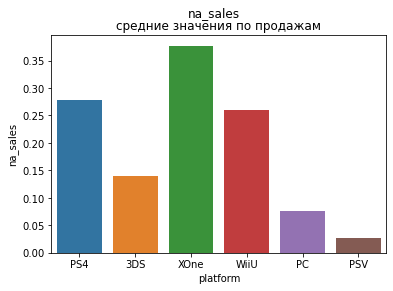

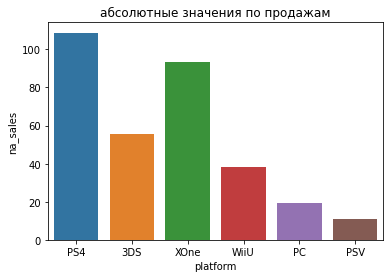

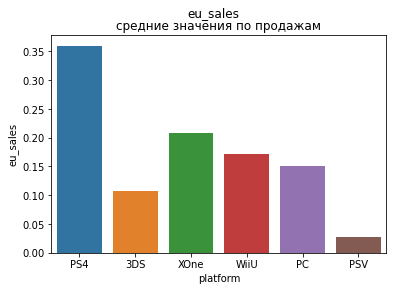

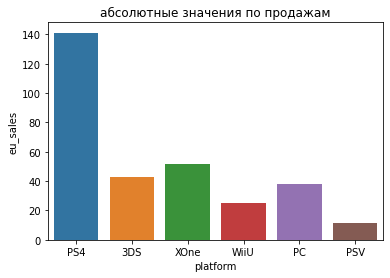

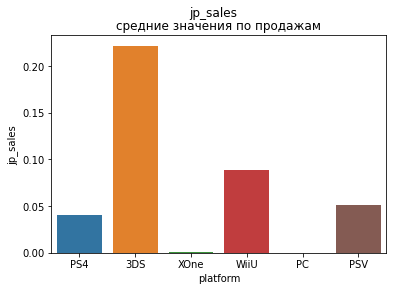

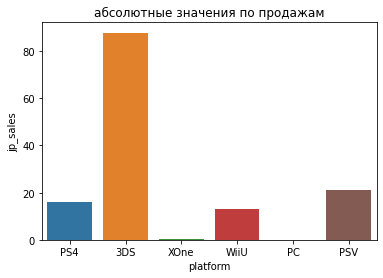

In [61]:
for i in ['na_sales','eu_sales','jp_sales']:
    plt.title('средние значения по продажам')
    plt.suptitle(i)
    sns.barplot(x='platform', y=i, data=df_last_5_years_top, ci=None)
    plt.show()
    plt.title('абсолютные значения по продажам')
    sns.barplot(x='platform', y=i, data=df_last_5_years_top, estimator=sum, ci=None)
    plt.show()

In [62]:
na_sales_top5 = df_last_5_years_top.query('platform == ["PS4","3DS", "PC", "XOne", "WiiU"]')
eu_sales_top5 = df_last_5_years_top.query('platform == ["PS4","3DS", "PC", "XOne", "WiiU"]')
jp_sales_top5 = df_last_5_years_top.query('platform == ["PS4","3DS","XOne", "WiiU", "PSV"]')

Добавим расчеты, которые покажут долю от глобальных продаж

In [63]:
na_sales_stat = na_sales_top5.groupby('platform')[['na_sales','total_sales']].sum().reset_index()
na_sales_stat['share_of_total_sales'] = (na_sales_stat['na_sales'] / na_sales_stat['total_sales']).round(2)
eu_sales_stat = eu_sales_top5.groupby('platform')[['eu_sales','total_sales']].sum().reset_index()
eu_sales_stat['share_of_total_sales'] = (eu_sales_stat['eu_sales'] / eu_sales_stat['total_sales']).round(2)
jp_sales_stat = jp_sales_top5.groupby('platform')[['jp_sales','total_sales']].sum().reset_index()
jp_sales_stat['share_of_total_sales'] = (jp_sales_stat['jp_sales'] / jp_sales_stat['total_sales']).round(4)

In [64]:
na_sales_stat

,platform,na_sales,total_sales,share_of_total_sales
0,3DS,55.31,194.61,0.28
1,PC,19.12,62.65,0.31
2,PS4,108.74,314.14,0.35
3,WiiU,38.10,82.19,0.46
4,XOne,93.12,159.32,0.58


В таблице выше, можно увидеть , что для XOne продажи в Северной Америке составляют львиную долю(58%) от общих продаж по миру

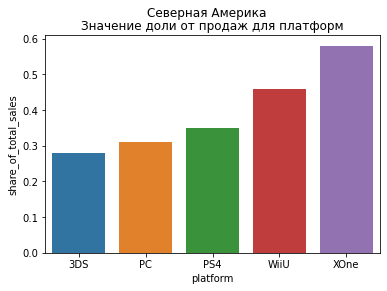

In [65]:
plt.title('Значение доли от продаж для платформ')
plt.suptitle('Северная Америка')
sns.barplot(x='platform', y='share_of_total_sales', data=na_sales_stat)
plt.show()

In [66]:
eu_sales_stat

,platform,eu_sales,total_sales,share_of_total_sales
0,3DS,42.64,194.61,0.22
1,PC,37.76,62.65,0.60
2,PS4,141.09,314.14,0.45
3,WiiU,25.13,82.19,0.31
4,XOne,51.59,159.32,0.32


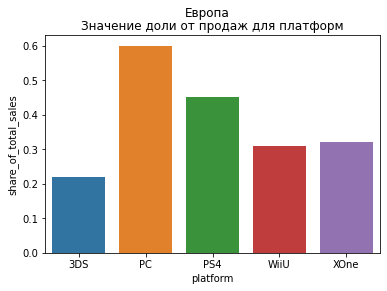

In [67]:
plt.title('Значение доли от продаж для платформ')
plt.suptitle('Европа')
sns.barplot(x='platform', y='share_of_total_sales', data=eu_sales_stat)
plt.show()

В Европе же крупную долю продаж от общих продаж платформы имеет ПК. Действительно, в Европе любят ПК=). Вместе с тем, PS4  все равно опережает по продажам ПК, но не по доли.

In [69]:
jp_sales_stat

,platform,jp_sales,total_sales,share_of_total_sales
0,3DS,87.79,194.61,0.4511
1,PS4,15.96,314.14,0.0508
2,PSV,21.04,49.18,0.4278
3,WiiU,13.01,82.19,0.1583
4,XOne,0.34,159.32,0.0021


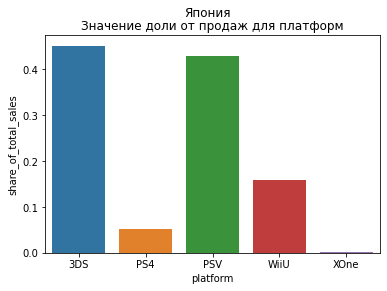

In [70]:
plt.title('Значение доли от продаж для платформ')
plt.suptitle('Япония')
sns.barplot(x='platform', y='share_of_total_sales', data=jp_sales_stat)
plt.show()

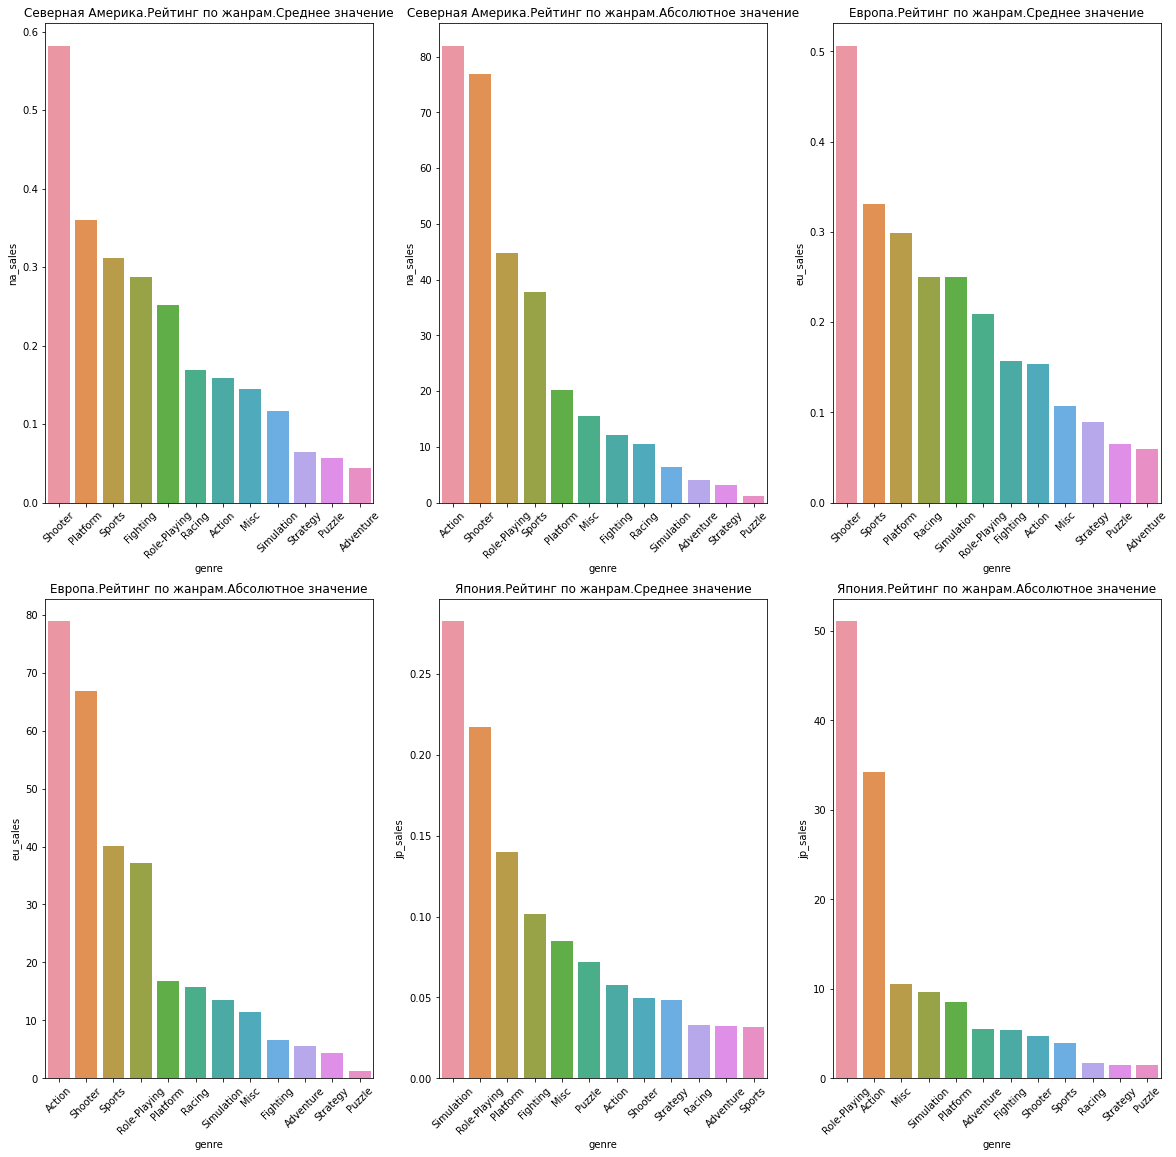

In [71]:
import pylab
pylab.figure(figsize=(20,30))
pylab.subplot (3, 3, 1)
plt.xticks(rotation=45)
plt.title('Северная Америка.Рейтинг по жанрам.Среднее значение')
sns.barplot(x='genre', y='na_sales', data=na_sales_top5, order=na_sales_top5.groupby('genre')['na_sales'].mean().reset_index().sort_values('na_sales', ascending=False)['genre'], ci=None)

pylab.subplot (3, 3, 2)
plt.xticks(rotation=45)
plt.title('Северная Америка.Рейтинг по жанрам.Абсолютное значение')
sns.barplot(x='genre', y='na_sales', data=na_sales_top5,estimator=sum, order=na_sales_top5.groupby('genre')['na_sales'].sum().reset_index().sort_values('na_sales', ascending=False)['genre'], ci=None)

pylab.subplot (3, 3, 3)
plt.xticks(rotation=45)
plt.title('Европа.Рейтинг по жанрам.Среднее значение')
sns.barplot(x='genre', y='eu_sales', data=eu_sales_top5, order=eu_sales_top5.groupby('genre')['eu_sales'].mean().reset_index().sort_values('eu_sales', ascending=False)['genre'], ci=None)

pylab.subplot (3, 3, 4)
plt.xticks(rotation=45)
plt.title('Европа.Рейтинг по жанрам.Абсолютное значение')
sns.barplot(x='genre', y='eu_sales', data=eu_sales_top5,estimator=sum, order=eu_sales_top5.groupby('genre')['eu_sales'].sum().reset_index().sort_values('eu_sales', ascending=False)['genre'], ci=None)

pylab.subplot (3, 3, 5)
plt.xticks(rotation=45)
plt.title('Япония.Рейтинг по жанрам.Среднее значение')
sns.barplot(x='genre', y='jp_sales', data=jp_sales_top5, order=jp_sales_top5.groupby('genre')['jp_sales'].mean().reset_index().sort_values('jp_sales', ascending=False)['genre'], ci=None)

pylab.subplot (3, 3, 6)
plt.xticks(rotation=45)
plt.title('Япония.Рейтинг по жанрам.Абсолютное значение')
sns.barplot(x='genre', y='jp_sales', data=jp_sales_top5,estimator=sum, order=jp_sales_top5.groupby('genre')['jp_sales'].sum().reset_index().sort_values('jp_sales', ascending=False)['genre'], ci=None)

pylab.show()


Здесь можно заметить, что рынки Северной Америки и Европы схожи по предподчтениям в жанре. Рынок Японии заметно отличается в своих предподчтениях по сравнению  с Америкой и Европой. 

In [72]:
na_sales_top_genre = na_sales_top5.groupby('genre')['na_sales'].sum().reset_index().sort_values('na_sales', ascending=False)
eu_sales_top_genre = eu_sales_top5.groupby('genre')['eu_sales'].sum().reset_index().sort_values('eu_sales', ascending=False)
jp_sales_top_genre = jp_sales_top5.groupby('genre')['jp_sales'].sum().reset_index().sort_values('jp_sales', ascending=False)

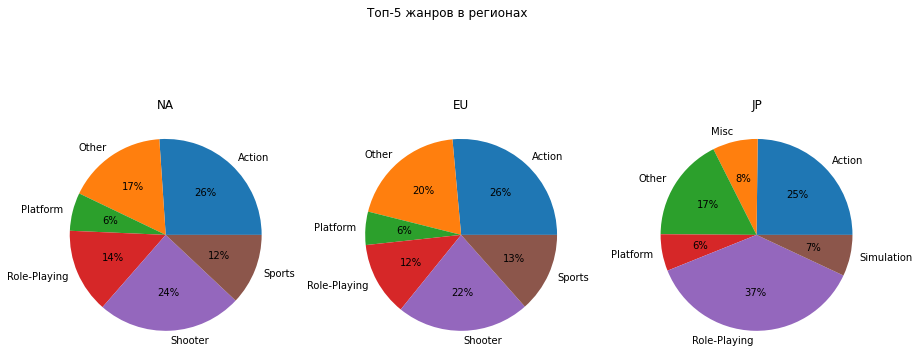

In [73]:
na_sales_top_genre.loc[na_sales_top_genre.na_sales < na_sales_top_genre.head(5)['na_sales'].min(), 'genre']='Other'
na_sales_top_genre = na_sales_top_genre.groupby('genre').sum().reset_index()
eu_sales_top_genre.loc[eu_sales_top_genre.eu_sales < eu_sales_top_genre.head(5)['eu_sales'].min(), 'genre']='Other'
eu_sales_top_genre = eu_sales_top_genre.groupby('genre').sum().reset_index()
jp_sales_top_genre.loc[jp_sales_top_genre.jp_sales < jp_sales_top_genre.head(5)['jp_sales'].min(), 'genre']='Other'
jp_sales_top_genre = jp_sales_top_genre.groupby('genre').sum().reset_index()


pylab.figure(figsize=(15,15))

pylab.subplot (3, 3, 1)
plt.title('NA')
plt.pie(na_sales_top_genre['na_sales'], labels = na_sales_top_genre['genre'],autopct='%.0f%%')

pylab.subplot (3, 3, 2)
plt.title('EU')
plt.pie(eu_sales_top_genre['eu_sales'], labels = eu_sales_top_genre['genre'],autopct='%.0f%%')

pylab.subplot (3, 3, 3)
plt.title('JP')
plt.pie(jp_sales_top_genre['jp_sales'], labels = jp_sales_top_genre['genre'],autopct='%.0f%%')

pylab.suptitle('Топ-5 жанров в регионах')

pylab.show()

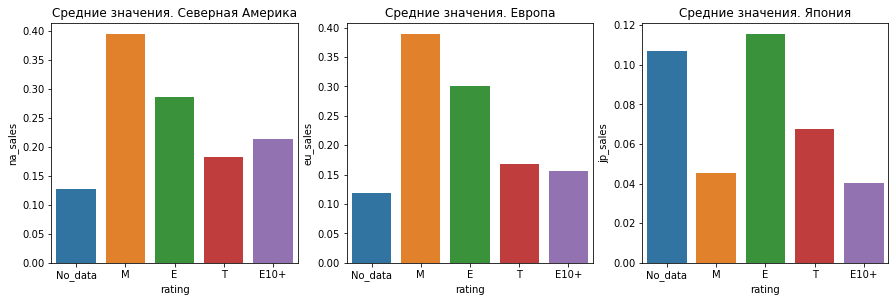

In [74]:
pylab.figure(figsize=(15,15))

pylab.subplot (3, 3, 1)
plt.title('Средние значения. Северная Америка')
sns.barplot(x='rating', y='na_sales', data=na_sales_top5, ci=None)

pylab.subplot (3, 3, 2)
plt.title('Средние значения. Европа')
sns.barplot(x='rating', y='eu_sales', data=eu_sales_top5, ci=None)

pylab.subplot (3, 3, 3)
plt.title('Средние значения. Япония')
sns.barplot(x='rating', y='jp_sales', data=jp_sales_top5, ci=None)


pylab.show()

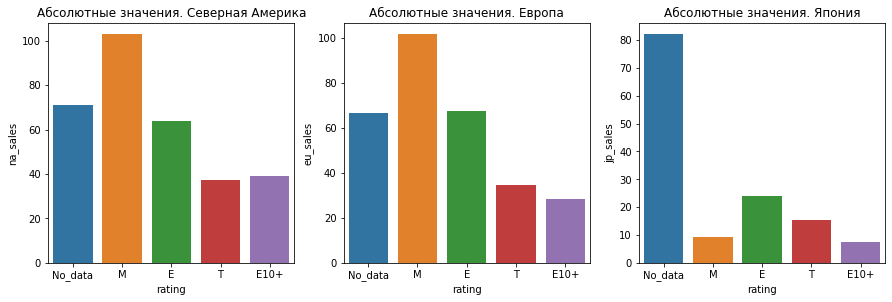

In [75]:
pylab.figure(figsize=(15,15))

pylab.subplot (3, 3, 1)
plt.title('Абсолютные значения. Северная Америка')
sns.barplot(x='rating', y='na_sales',  estimator = sum , data=na_sales_top5, ci=None)

pylab.subplot (3, 3, 2)
plt.title('Абсолютные значения. Европа')
sns.barplot(x='rating', y='eu_sales', estimator = sum, data=eu_sales_top5, ci=None)

pylab.subplot (3, 3, 3)
plt.title('Абсолютные значения. Япония')
sns.barplot(x='rating', y='jp_sales', estimator = sum, data=jp_sales_top5, ci=None)

pylab.show()

<b>Вывод:</b> Можно увидеть, что в Северной Америке лидируют продажи на платформах PS4 и XOne. В Евпрое PS4, а ПК по абсолютным показателям в Европе даже на втром месте и значительно популярнее чем в Северной Америке. В Японии однозначно популярнее 3DS. В Северной Америке доля от продаж больше всего у XOne. В Европе ПК, а в Японии 3DS и PSV. Также анализ показал, что рынки Северной Америки и Европы схожи по предподчтениям в жанре. Рынок Японии заметно отличается в своих предподчтениях по сравнению  с Америкой и Европой.  Продажи в зависимости от возрастного рейтинга схожи между Америкой и Европой, но Японский рынок резко отличается. Особенно это касается продаж игр с рейтингом 'М'. Можно предположить, что в Европе и Северной Америке больше продаж среди игроков старше  17ти лет и в целом игры для аудитории такого возраста востребованы. В Японии же более востребованы игры рейтинга 'E', т.е. востребованы и хорошо продаются игры для аудитории младше,чем в Северной Америке и Европе.

## 5. Проверка гипотез

H0: Среднее пользовательских оценок XOne == Среднее пользовательских оценок PC
</p>H1: Среднее пользовательских оценок XOne != Среднее пользовательских оценок PC

In [76]:
alpha = 0.05 

sample_1 = df_last_5_years_top_filtred_user.query('platform == "XOne"')['user_score']
sample_2 = df_last_5_years_top_filtred_user.query('platform == "PC"')['user_score']
results_1 = st.ttest_ind( sample_1, sample_2)

print('p-значение: ', results_1.pvalue)

if results_1.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


In [77]:
sample_1.min(), sample_2.min()

(1.6, 1.4)

In [78]:
print('Среднее пользовательских оценок XOne:', df_last_5_years_top_filtred_user.query('platform == "XOne"')['user_score'].mean())
print('Среднее пользовательских оценок PC:', df_last_5_years_top_filtred_user.query('platform == "PC"')['user_score'].mean())

Среднее пользовательских оценок XOne: 6.52142857142857
Среднее пользовательских оценок PC: 6.428640776699027


<b>Гипотезу о равенстве исходя из теста не получилось отвергнуть. Следовательно средние пользовательские рейтинги платформ Xbox One и PC действительно близки

H0: Среднее пользовательских оценок Action == Среднее пользовательских оценок Sports
</p>H1: Среднее пользовательских оценок Action != Среднее пользовательских оценок Sports

In [79]:
alpha = 0.05 

sample_2 = df_last_5_years_top_filtred_user.query('genre == "Action"')['user_score']
sample_3 = df_last_5_years_top_filtred_user.query('genre == "Sports"')['user_score']
results_2 = st.ttest_ind( sample_2, sample_3)

print('p-значение: ', results_2.pvalue)

if results_2.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.5803817191757584e-14
Отвергаем нулевую гипотезу


In [80]:
print('Среднее пользовательских оценок Action:',df_last_5_years_top_filtred_user.query('genre == "Action"')['user_score'].mean())
print('Среднее пользовательских оценок Sports:',df_last_5_years_top_filtred_user.query('genre == "Sports"')['user_score'].mean())

Среднее пользовательских оценок Action: 6.887537091988133
Среднее пользовательских оценок Sports: 5.65892857142857


<b> Гипотезу о равенстве средних значений можно отвергнуть. Следовательно средние пользовательские рейтинги жанров Action и Sports разные

## 6. Общий вывод

* В ходе работы над данными были исправлены некорректные названия столбцов, пропуски в данных, неподходящие типы  данных.На  этапе анализа данных была рассмотрена динамика выхода игр по годам.
* Исходя из этого был определен подходящий для анализа период, был определен жизненный цикл для разных платформ.Он составил 10 лет.
* На основе анализа был сделан вывод, что оценки критиков влияют значительнее на продажи. Выделяются платформы 3DS и WiiU. Там оценки критиков и пользователей имеют небольшую положительную корреляцию с продажами.
* Далее был составлен портрет потребителя для каждого рынка. Можно увидеть, что в Северной Америке лидируют продажи на платформах PS4 и XOne. В Евпрое PS4, а ПК по абсолютным показателям в Европе даже на втром месте и значительно популярнее чем в Северной Америке. В Японии однозначно популярнее 3DS. В Северной Америке доля от продаж больше всего у XOne. В Европе ПК, а в Японии 3DS и PSV.
* Также анализ показал, что рынки Северной Америки и Европы схожи по предподчтениям в жанре.
*  Рынок Японии заметно отличается в своих предподчтениях по сравнению  с Америкой и Европой.
*  Продажи в зависимости от возрастного рейтинга схожи между Америкой и Европой, но Японский рынок резко отличается.
*  В ходе проверки гипотез, проведения т-тестов было выявлено,что средние пользовательские рейтинги платформ Xbox One и PC близки. Средние пользовательские рейтинги жанров Action и Sports разные.